# Measures of Central Tedency

### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import numpy as np
from statsmodels import robust
sns.set()

### Loading data

In [2]:
data = pd.read_csv('C:/Users/HP/Practical-Statistics-for-data-science/Exploratory Data Analysis/Location Estimates of Population and Murder Rates/state.csv')
data.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Mean

In [3]:
mean = data['Population'].mean()
mean

6162876.3

### Median

In [4]:
median = data['Population'].median()
median

4436369.5

### Trimmed Mean

In [5]:
trim_mean(data['Population'], 0.1)

4783697.125

The Mean is greater than trimmed and which is greater than median as trimmed mean drops the 10% that is 5 of upper and lower states

### What is average rate of murder for the country? 
We need to consider the weighted mean because the of different population sizes of each of the state is different

In [6]:
np.average(data['Murder.Rate'] , weights = data['Population'])

4.445833981123393

# Variability Estimates of States Population

### Standard Deviation

In [7]:
data['Population'].std()

6848235.347401142

### Interquartile Range (75% quantile - 25% quantile)

In [8]:
value = data['Population'].quantile(0.75) - data['Population'].quantile(0.25)
value

4847308.0

### Median Absolute Deviation

In [9]:
robust.scale.mad(data['Population'])

3849876.1459979336

# Exploring the Data Distribution

### Boxplote

Text(0, 0.5, 'Population (millions)')

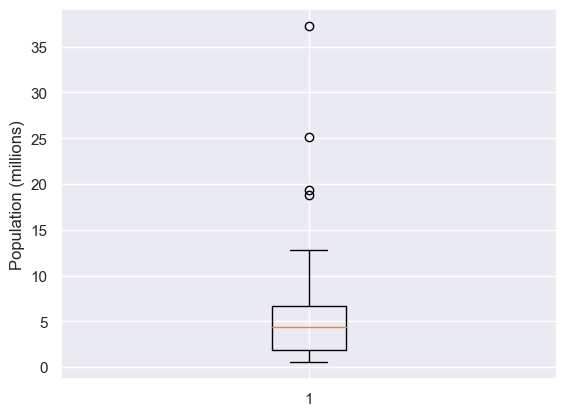

In [10]:
plt.boxplot(data['Population']/1_000_000);
plt.ylabel('Population (millions)')

#### Median
The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts.
#### Median (Q2):
The median is a measure of central tendency that represents the middle value of the dataset. It's indicated by a horizontal line within the box. The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3).

#### First Quartile (Q1):
The first quartile is the median of the lower half of the data. It marks the 25th percentile of the dataset. It's the bottom edge of the box.

#### Third Quartile (Q3): 
The third quartile is the median of the upper half of the data. It marks the 75th percentile of the dataset. It's the top edge of the box.

#### Interquartile Range (IQR): 
The IQR is the range between Q1 and Q3. It provides a measure of the spread of the middle 50% of the data. It's the height of the box.

#### Whiskers: 
The whiskers extend from the edges of the box to indicate the range of the data beyond the quartiles. The length of the whiskers varies, and they usually extend up to 1.5 times the IQR from the quartiles. Data points beyond the whiskers are considered potential outliers.

#### Outliers:
Individual data points that are significantly different from the rest of the data are considered outliers. They are plotted individually as points beyond the whiskers.


If the upper whisker of a box plot is longer than the lower whisker, it indicates that the upper part of the data distribution has a larger spread or more variability than the lower part. In other words, the upper values of the dataset are more dispersed from the median compared to the lower values.


### Frequency Table and Histogram

In [11]:
binnedPopulation = pd.cut(data['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

(array([0.13082466, 0.07631439, 0.03270617, 0.01090206, 0.00545103,
        0.00545103, 0.00545103, 0.        , 0.        , 0.00545103]),
 array([ 0.563626,  4.232659,  7.901692, 11.570725, 15.239758, 18.908791,
        22.577824, 26.246857, 29.91589 , 33.584923, 37.253956]),
 <BarContainer object of 10 artists>)

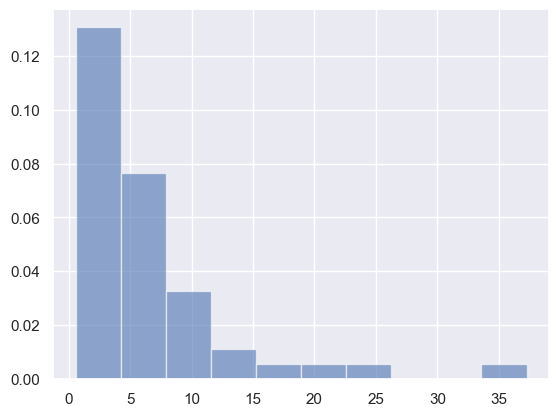

In [19]:

# Create a histogram
plt.hist(data['Population'] / 1_000_000, bins=10, density=True, alpha=0.6, label='Histogram')

### Density plots

<Axes: ylabel='Density'>

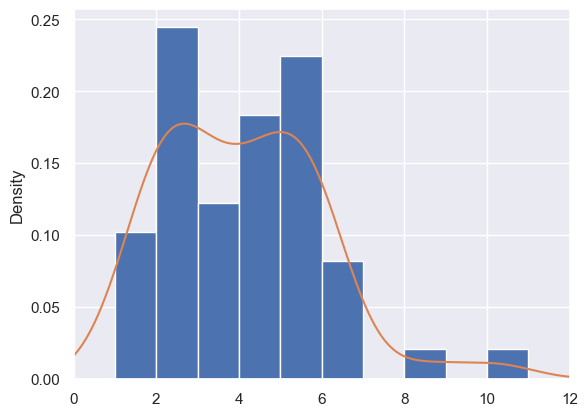

In [15]:
ax = data['Murder.Rate'].plot.hist(density = True, xlim = [0, 12], bins = range(1, 12))
data['Murder.Rate'].plot.density(ax = ax)

<Axes: ylabel='Density'>

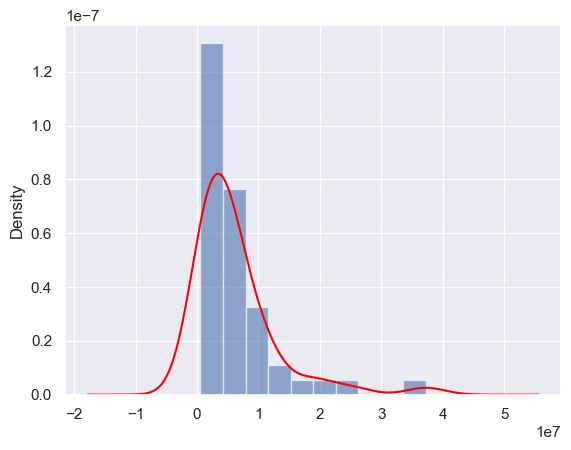

In [22]:
ax = data['Population'].plot.hist(density=True, bins=10, alpha=0.6)

# Overlay a kernel density estimate on the same axes
data['Population'].plot.density(ax=ax, color='red')